# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys_Abney import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

In [3]:
city = cities[0]
city

'iqaluit'

In [4]:
lat_lngs[0:10]

[(80.42234088383934, -78.82419094698626),
 (-65.10193761241324, 50.79678755347628),
 (82.70842269057023, 5.520508681557628),
 (26.485874367581147, -149.86953789874684),
 (-32.66420933808738, -76.68799759003029),
 (-33.191590851596025, -78.33700358071158),
 (57.116985297042994, 150.45802624511384),
 (-74.06772431335744, 141.1388457360633),
 (60.98992580799746, -79.87884183795894),
 (-7.329661229142133, 17.382007402019962)]

In [5]:
city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
response = requests.get(city_url)
city_weather = response.json()
city_weather

{'coord': {'lon': -68.5145, 'lat': 63.7506},
 'weather': [{'id': 600,
   'main': 'Snow',
   'description': 'light snow',
   'icon': '13n'}],
 'base': 'stations',
 'main': {'temp': 271.87,
  'feels_like': 265.99,
  'temp_min': 271.87,
  'temp_max': 272,
  'pressure': 1007,
  'humidity': 74},
 'visibility': 3621,
 'wind': {'speed': 6.17, 'deg': 100, 'gust': 10.29},
 'snow': {'1h': 0.28},
 'clouds': {'all': 100},
 'dt': 1700258829,
 'sys': {'type': 2,
  'id': 47658,
  'country': 'CA',
  'sunrise': 1700226289,
  'sunset': 1700249604},
 'timezone': -18000,
 'id': 5983720,
 'name': 'Iqaluit',
 'cod': 200}

In [6]:
#use get method for try
city_lat = city_weather.get("coord", {}).get("lat", None)
city_lng = city_weather.get("coord", {}).get("lon", None)
city_max_temp = city_weather.get("main", {}).get("temp_max", None)
city_humidity = city_weather.get("main", {}).get("humidity", None)
city_clouds = city_weather.get("clouds", {}).get("all", None)
city_wind = city_weather.get("wind", {}).get("speed", None)
city_country = city_weather.get("sys", {}).get("country", None)
city_date = city_weather.get("dt", None)




In [7]:
{"City": city, "Lat": city_lat, "Lng": city_lng,
"Max Temp": city_max_temp, "Humidity": city_humidity,
"Cloudiness": city_clouds, "Wind Speed": city_wind, "Country": city_country,
"Date": city_date}

{'City': 'iqaluit',
 'Lat': 63.7506,
 'Lng': -68.5145,
 'Max Temp': 272,
 'Humidity': 74,
 'Cloudiness': 100,
 'Wind Speed': 6.17,
 'Country': 'CA',
 'Date': 1700258829}

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [71]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities[0:593]):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url)
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat", None)
        city_lng = city_weather.get("coord", {}).get("lon", None)
        city_max_temp = city_weather.get("main", {}).get("temp_max", None)
        city_humidity = city_weather.get("main", {}).get("humidity", None)
        city_clouds = city_weather.get("clouds", {}).get("all", None)
        city_wind = city_weather.get("wind", {}).get("speed", None)
        city_country = city_weather.get("sys", {}).get("country", None)
        city_date = city_weather.get("dt", None)

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as exc:
        print (exc)
        print(f"City {city} not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | haiku-pauwela
Processing Record 5 of Set 1 | constitucion
Processing Record 6 of Set 1 | magadan
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | kasongo-lunda
Processing Record 9 of Set 1 | volodymyr-volynskyi
Processing Record 10 of Set 1 | middelburg
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | buedu
Processing Record 16 of Set 1 | hadibu
Processing Record 17 of Set 1 | iskateley
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | aasiaat
Processing Record 20 of Set 1 | maceio
Processing Record 21 of Set 1 | mezhdurechenskiy
Processing Record 22 of Set 1 | kangding

Processing Record 44 of Set 4 | ataq
Processing Record 45 of Set 4 | port mathurin
Processing Record 46 of Set 4 | acajutla
Processing Record 47 of Set 4 | sao gabriel da cachoeira
Processing Record 48 of Set 4 | antalaha
Processing Record 49 of Set 4 | little cayman
Processing Record 0 of Set 5 | san pedro pochutla
Processing Record 1 of Set 5 | okhotsk
Processing Record 2 of Set 5 | bertoua
Processing Record 3 of Set 5 | vilyuysk
Processing Record 4 of Set 5 | mount gambier
Processing Record 5 of Set 5 | kawthoung
Processing Record 6 of Set 5 | ban phe
Processing Record 7 of Set 5 | korla
Processing Record 8 of Set 5 | smithers
Processing Record 9 of Set 5 | redon
Processing Record 10 of Set 5 | namdrik
Processing Record 11 of Set 5 | port moresby
Processing Record 12 of Set 5 | lilongwe
Processing Record 13 of Set 5 | emerald
Processing Record 14 of Set 5 | baranchinskiy
Processing Record 15 of Set 5 | madang
Processing Record 16 of Set 5 | tangalle
Processing Record 17 of Set 5 | f

Processing Record 40 of Set 8 | cardigan
Processing Record 41 of Set 8 | fes al bali
Processing Record 42 of Set 8 | homer
Processing Record 43 of Set 8 | leh
Processing Record 44 of Set 8 | cidreira
Processing Record 45 of Set 8 | copiapo
Processing Record 46 of Set 8 | sorong
Processing Record 47 of Set 8 | hargeysa
Processing Record 48 of Set 8 | surman
Processing Record 49 of Set 8 | we
Processing Record 0 of Set 9 | al hada
Processing Record 1 of Set 9 | al fqih ben calah
Processing Record 2 of Set 9 | egilsstadir
Processing Record 3 of Set 9 | tolanaro
Processing Record 4 of Set 9 | berezovyy
Processing Record 5 of Set 9 | port blair
Processing Record 6 of Set 9 | fort st. john
Processing Record 7 of Set 9 | ascension
Processing Record 8 of Set 9 | bokoro
Processing Record 9 of Set 9 | dakhla
Processing Record 10 of Set 9 | sandakan
Processing Record 11 of Set 9 | el bauga
Processing Record 12 of Set 9 | cockburn town
Processing Record 13 of Set 9 | urangan
Processing Record 14 o

Processing Record 35 of Set 12 | kegeyli shahar
Processing Record 36 of Set 12 | chaoyang
Processing Record 37 of Set 12 | moranha
Processing Record 38 of Set 12 | bamboo flat
Processing Record 39 of Set 12 | ha'il
Processing Record 40 of Set 12 | stony plain
Processing Record 41 of Set 12 | lhokseumawe
Processing Record 42 of Set 12 | 'ohonua
-----------------------------
Data Retrieval Complete      
-----------------------------


In [72]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df = city_data_df.dropna()
# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [73]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,29.93,74.0,100.0,16.11,CA,1.700263e+09
1,port-aux-francais,-49.3500,70.2167,42.06,97.0,100.0,29.21,TF,1.700263e+09
2,longyearbyen,78.2186,15.6401,-4.94,91.0,41.0,2.86,SJ,1.700263e+09
3,haiku-pauwela,20.9219,-156.3051,80.62,64.0,40.0,19.57,US,1.700263e+09
4,constitucion,-35.3333,-72.4167,54.73,88.0,88.0,1.34,CL,1.700262e+09


In [74]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [75]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,29.93,74.0,100.0,16.11,CA,1.700263e+09
1,port-aux-francais,-49.3500,70.2167,42.06,97.0,100.0,29.21,TF,1.700263e+09
2,longyearbyen,78.2186,15.6401,-4.94,91.0,41.0,2.86,SJ,1.700263e+09
3,haiku-pauwela,20.9219,-156.3051,80.62,64.0,40.0,19.57,US,1.700263e+09
4,constitucion,-35.3333,-72.4167,54.73,88.0,88.0,1.34,CL,1.700262e+09


In [76]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 591
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        569 non-null    object 
 1   Lat         569 non-null    float64
 2   Lng         569 non-null    float64
 3   Max Temp    569 non-null    float64
 4   Humidity    569 non-null    float64
 5   Cloudiness  569 non-null    float64
 6   Wind Speed  569 non-null    float64
 7   Country     565 non-null    object 
 8   Date        569 non-null    float64
dtypes: float64(7), object(2)
memory usage: 44.5+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

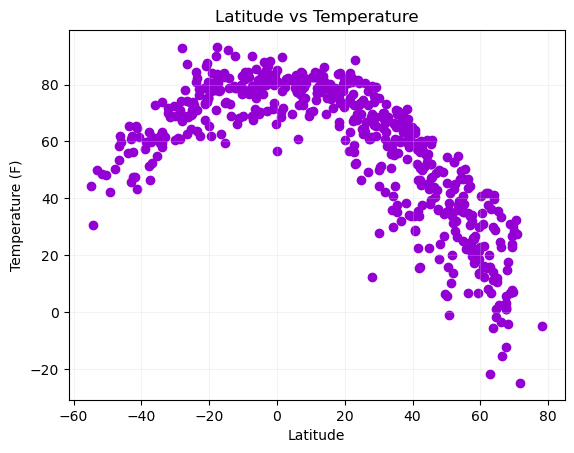

In [77]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color="darkviolet")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Latitude vs Temperature")
plt.grid(color="lightgrey", alpha=0.25)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

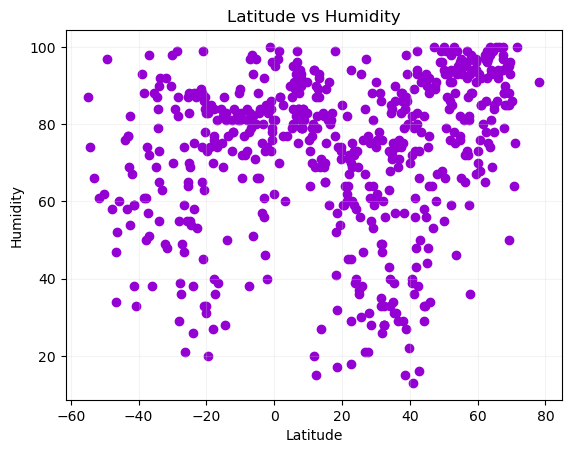

In [78]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color="darkviolet")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
plt.grid(color="lightgrey", alpha=0.25)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

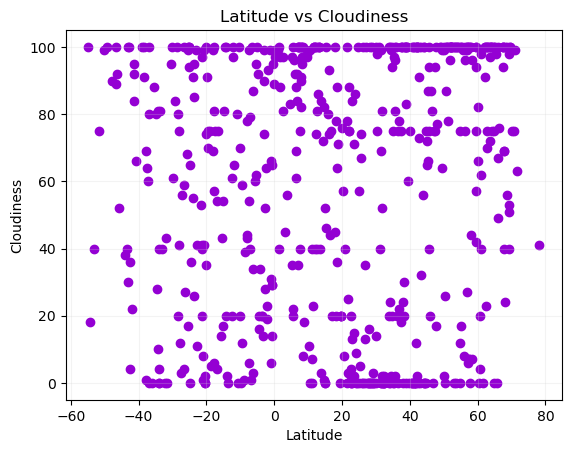

In [79]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color="darkviolet")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
plt.grid(color="lightgrey", alpha=0.25)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

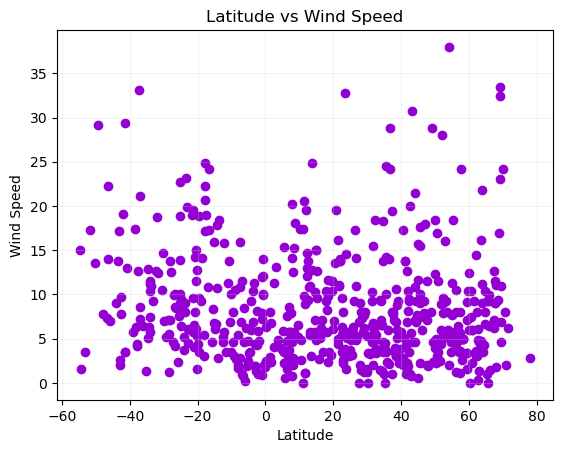

In [81]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color="darkviolet")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.grid(color="lightgrey", alpha=0.25)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [82]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def LinearRegressionPlot(x, y, y_col, hemi, annot_loc):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_equat = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # make actual scatter plot
    plt.scatter(x,y)
    plt.plot(x,regress_values, "r-")
    plt.annotate(line_equat, annot_loc, fontsize=13, color="black")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_col}')
    plt.title(f'Latitude vs {y_col} ({hemi} Hemisphere)')
    plt.show()







In [83]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,29.93,74.0,100.0,16.11,CA,1.700263e+09
2,longyearbyen,78.2186,15.6401,-4.94,91.0,41.0,2.86,SJ,1.700263e+09
3,haiku-pauwela,20.9219,-156.3051,80.62,64.0,40.0,19.57,US,1.700263e+09
5,magadan,59.5667,150.8000,18.63,94.0,100.0,1.54,RU,1.700263e+09
8,volodymyr-volynskyi,50.8525,24.3236,38.46,87.0,100.0,11.50,UA,1.700262e+09


In [84]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,42.06,97.0,100.0,29.21,TF,1.700263e+09
4,constitucion,-35.3333,-72.4167,54.73,88.0,88.0,1.34,CL,1.700262e+09
6,blackmans bay,-43.0167,147.3167,60.93,77.0,100.0,1.99,AU,1.700263e+09
7,kasongo-lunda,-6.4667,16.8167,71.31,98.0,100.0,0.83,CD,1.700262e+09
9,middelburg,-25.7751,29.4648,69.30,55.0,68.0,2.33,ZA,1.700262e+09


###  Temperature vs. Latitude Linear Regression Plot

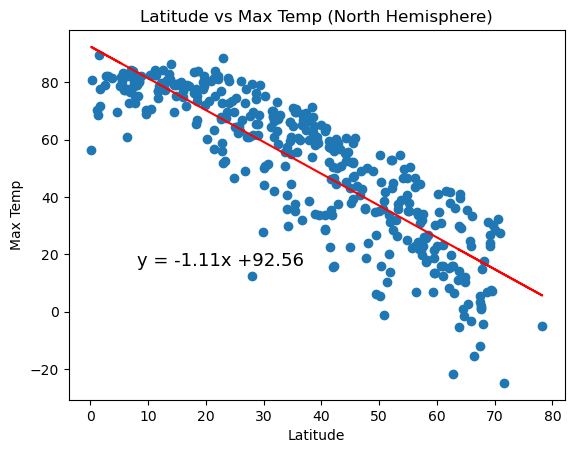

In [85]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

LinearRegressionPlot(x,y, "Max Temp", "North", (8,16))

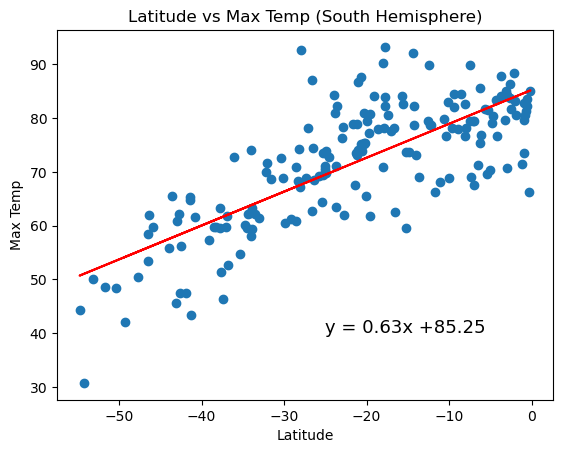

In [86]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

LinearRegressionPlot(x,y, "Max Temp", "South", (-25,40))

**Discussion about the linear relationship:** There is a clear relationship for max temperature and latitude shown above. The closer the latitude is to 0, the max temperatures are likely to be higher.

### Humidity vs. Latitude Linear Regression Plot

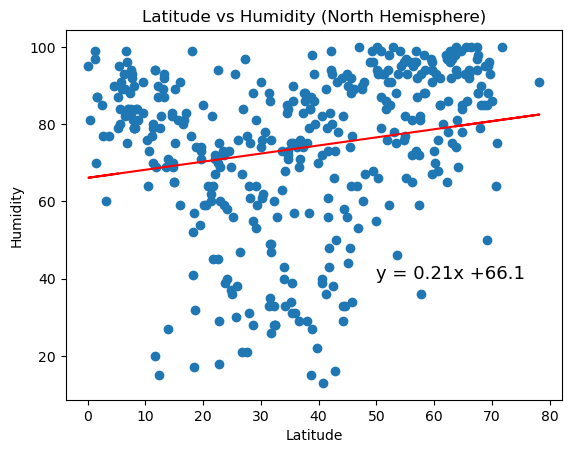

In [87]:
# Northern Hemisphere

x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

LinearRegressionPlot(x,y, "Humidity", "North", (50,40))

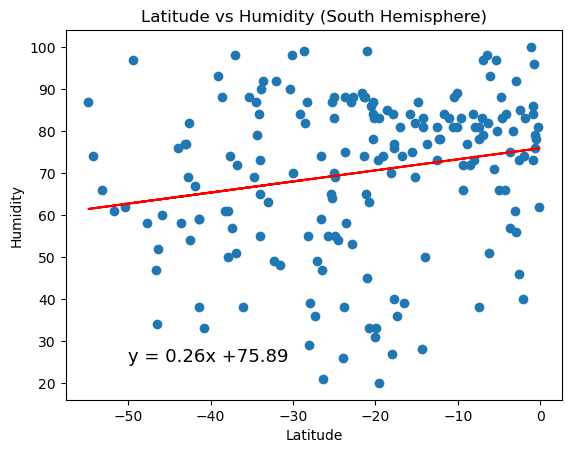

In [89]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

LinearRegressionPlot(x,y, "Humidity", "South", (-50,25))

**Discussion about the linear relationship:** This relationship is not quite as clear as the first one. It does seem to be more humid, the closer the latitude is to 0, however the humidity still varies significantly across these visualizations.

### Cloudiness vs. Latitude Linear Regression Plot

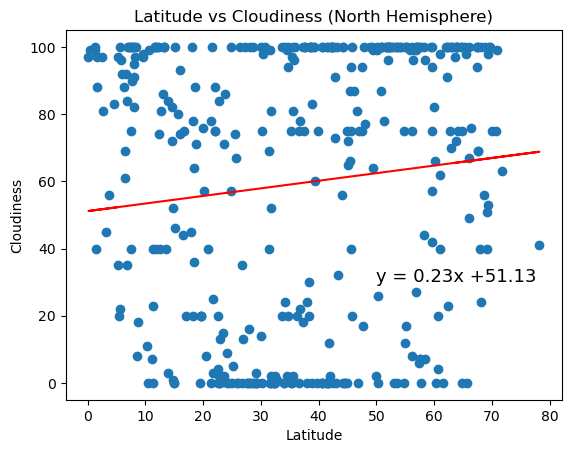

In [90]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']

LinearRegressionPlot(x,y, "Cloudiness", "North", (50,30))

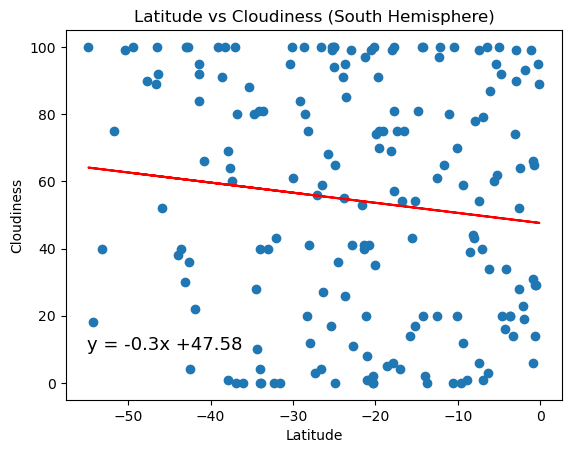

In [91]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']

LinearRegressionPlot(x,y, "Cloudiness", "South", (-55,10))

**Discussion about the linear relationship:** This relationship is not significant as the cloudiness appears to vary regardless of latitude. However, the cloudiness does appear to be extreme, meaning that few cities range from 20-80 and most are in the 0-20 or 80-100 cloudiness range

### Wind Speed vs. Latitude Linear Regression Plot

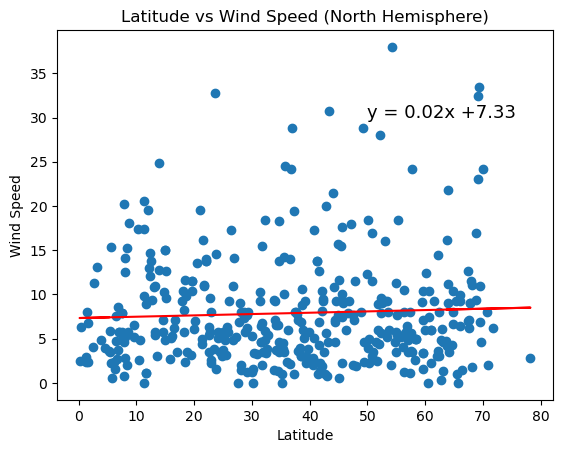

In [92]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']

LinearRegressionPlot(x,y, "Wind Speed", "North", (50,30))

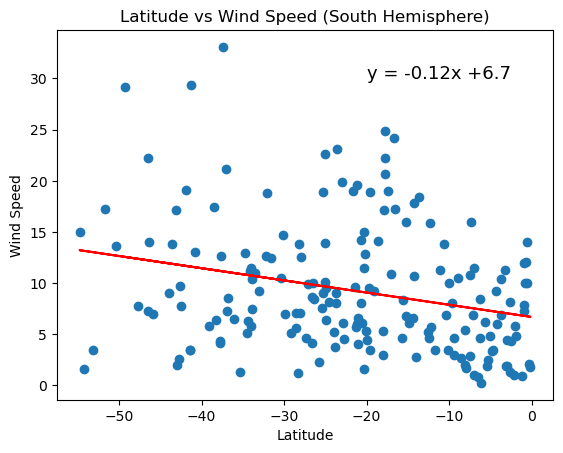

In [95]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

LinearRegressionPlot(x,y, "Wind Speed", "South", (-20,30))

**Discussion about the linear relationship:** The wind speed for the Northern Hemisphere seems to be rather consistent compared to the Southern Hemisphere. The Southern Hemisphere shows that wind speeds tend to increase the lower the latitude. 